<a href="https://colab.research.google.com/github/wizard339/education/blob/main/mnist_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as M

print(tf.__version__)

2.9.2


In [2]:
# Проверяем что у нас работает GPU
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
#GPU count and name
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-455307c5-a44c-0c22-3368-306b15a71760)


## Load and preprocess MNIST dataset

In [4]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()

train_x = (train_x.reshape(-1, 28*28).astype(np.float32) - 127.5) / 127.5

print(train_x.shape, train_x.dtype)
print(np.min(train_x), np.max(train_x))

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784) float32
-1.0 1.0


## Draw MNIST examples

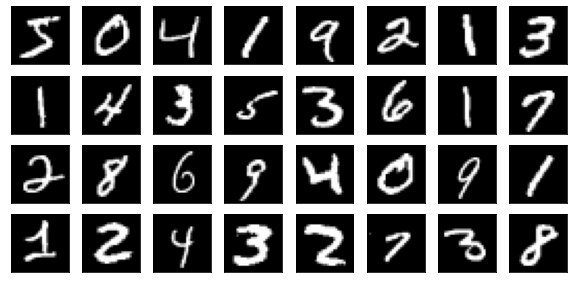

In [5]:
def plot_digits(samples):
    fig = plt.figure(figsize=(10, 10))
    num = samples.shape[0]
    for j in range(num):
        ax = fig.add_subplot(8, 8, j+1)
        ax.imshow(samples[j, ...].reshape(28, 28), cmap='gray')
        plt.xticks([]), plt.yticks([])
    plt.show()
    
plot_digits(train_x[:32, ...])

## Create GAN parts: Generator and Discriminator

In [6]:
generator = M.Sequential([
    L.Dense(256),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(512),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(1024),
    L.LeakyReLU(0.2),
    L.BatchNormalization(momentum=0.8),
    L.Dense(784, activation='tanh'),
])

discriminator = M.Sequential([
    L.Dense(784, activation=None),
    L.LeakyReLU(alpha=0.2),
    L.Dense(392, activation=None),
    L.LeakyReLU(alpha=0.2),
    L.Dense(1, activation=None),
])

## Training parameters, dataset pipeline, optimizer

In [7]:
INPUT_DIM = 100
NUM_EPOCHS = 5
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x)
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

## GAN training

1/1 [==============================] - 2s 2s/step
[Step  0] D Loss: 0.5996; G Loss: 0.7272
1/1 [==============================] - 0s 13ms/step


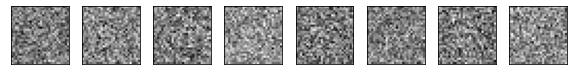

1/1 [==============================] - 0s 14ms/step
[Step 500] D Loss: 0.1164; G Loss: 4.7383
1/1 [==============================] - 0s 14ms/step


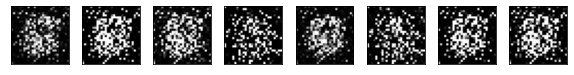

1/1 [==============================] - 0s 13ms/step
[Step 1000] D Loss: 0.1684; G Loss: 3.0289
1/1 [==============================] - 0s 14ms/step


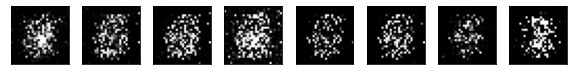

1/1 [==============================] - 0s 13ms/step
[Step 1500] D Loss: 0.3276; G Loss: 3.6167
1/1 [==============================] - 0s 14ms/step


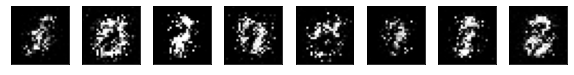

1/1 [==============================] - 0s 12ms/step
[Step 2000] D Loss: 0.3342; G Loss: 2.5665
1/1 [==============================] - 0s 14ms/step


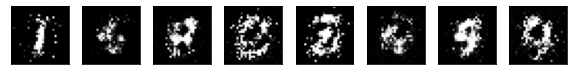

1/1 [==============================] - 0s 13ms/step
[Step 2500] D Loss: 0.5579; G Loss: 1.2834
1/1 [==============================] - 0s 12ms/step


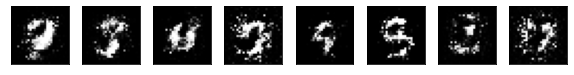

1/1 [==============================] - 0s 19ms/step
[Step 3000] D Loss: 0.5072; G Loss: 1.8711
1/1 [==============================] - 0s 12ms/step


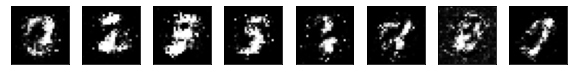

1/1 [==============================] - 0s 12ms/step
[Step 3500] D Loss: 0.3745; G Loss: 1.9096
1/1 [==============================] - 0s 13ms/step


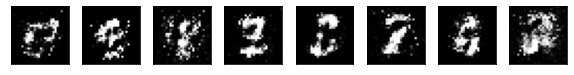

1/1 [==============================] - 0s 17ms/step
[Step 4000] D Loss: 0.5434; G Loss: 1.3579
1/1 [==============================] - 0s 15ms/step


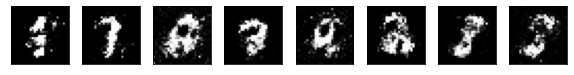

1/1 [==============================] - 0s 13ms/step
[Step 4500] D Loss: 0.5893; G Loss: 1.6952
1/1 [==============================] - 0s 14ms/step


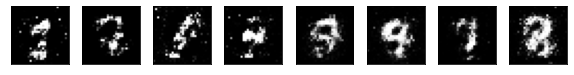

1/1 [==============================] - 0s 12ms/step
[Step 5000] D Loss: 0.4649; G Loss: 1.5355
1/1 [==============================] - 0s 12ms/step


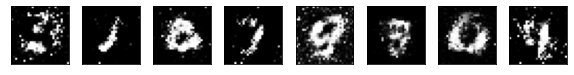

1/1 [==============================] - 0s 13ms/step
[Step 5500] D Loss: 0.5718; G Loss: 0.8261
1/1 [==============================] - 0s 13ms/step


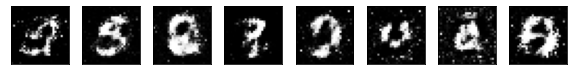

1/1 [==============================] - 0s 13ms/step
[Step 6000] D Loss: 0.5546; G Loss: 1.8286
1/1 [==============================] - 0s 13ms/step


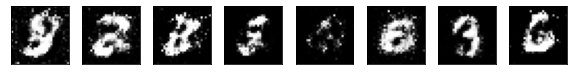

1/1 [==============================] - 0s 14ms/step
[Step 6500] D Loss: 0.3960; G Loss: 2.3096
1/1 [==============================] - 0s 14ms/step


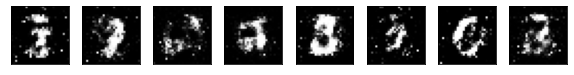

1/1 [==============================] - 0s 14ms/step
[Step 7000] D Loss: 0.4122; G Loss: 1.8150
1/1 [==============================] - 0s 13ms/step


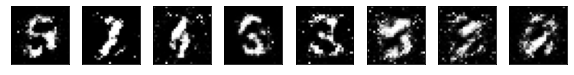

1/1 [==============================] - 0s 12ms/step
[Step 7500] D Loss: 0.5959; G Loss: 1.3758
1/1 [==============================] - 0s 12ms/step


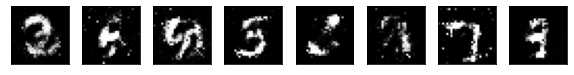

1/1 [==============================] - 0s 13ms/step
[Step 8000] D Loss: 0.5577; G Loss: 1.8709
1/1 [==============================] - 0s 14ms/step


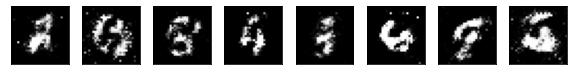

1/1 [==============================] - 0s 15ms/step
[Step 8500] D Loss: 0.4817; G Loss: 1.8761
1/1 [==============================] - 0s 16ms/step


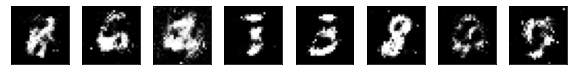

1/1 [==============================] - 0s 12ms/step
[Step 9000] D Loss: 0.7488; G Loss: 1.1191
1/1 [==============================] - 0s 12ms/step


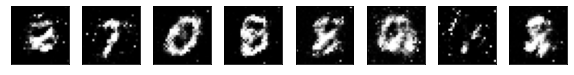

1/1 [==============================] - 0s 14ms/step
[Step 9500] D Loss: 0.3810; G Loss: 1.0235
1/1 [==============================] - 0s 13ms/step


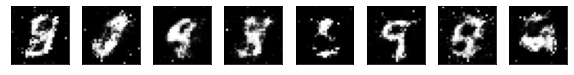

1/1 [==============================] - 0s 13ms/step
[Step 10000] D Loss: 0.4228; G Loss: 1.7095
1/1 [==============================] - 0s 14ms/step


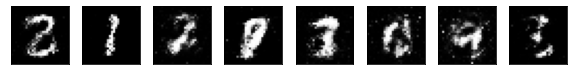

1/1 [==============================] - 0s 19ms/step
[Step 10500] D Loss: 0.4615; G Loss: 1.1787
1/1 [==============================] - 0s 19ms/step


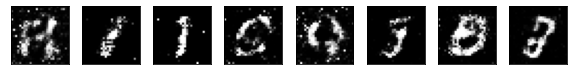

1/1 [==============================] - 0s 12ms/step
[Step 11000] D Loss: 0.5688; G Loss: 1.5012
1/1 [==============================] - 0s 12ms/step


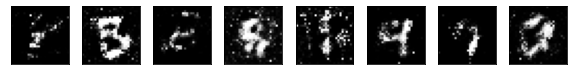

1/1 [==============================] - 0s 13ms/step
[Step 11500] D Loss: 0.4812; G Loss: 1.4506
1/1 [==============================] - 0s 13ms/step


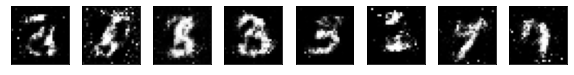

1/1 [==============================] - 0s 12ms/step
[Step 12000] D Loss: 0.5541; G Loss: 1.8369
1/1 [==============================] - 0s 13ms/step


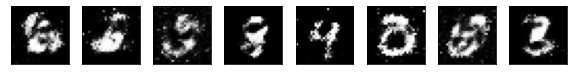

1/1 [==============================] - 0s 14ms/step
[Step 12500] D Loss: 0.7043; G Loss: 0.5951
1/1 [==============================] - 0s 14ms/step


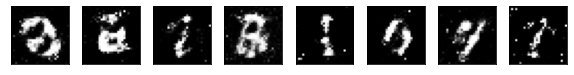

1/1 [==============================] - 0s 14ms/step
[Step 13000] D Loss: 0.5409; G Loss: 2.2296
1/1 [==============================] - 0s 13ms/step


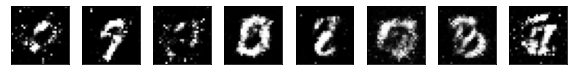

1/1 [==============================] - 0s 13ms/step
[Step 13500] D Loss: 0.5980; G Loss: 2.0128
1/1 [==============================] - 0s 13ms/step


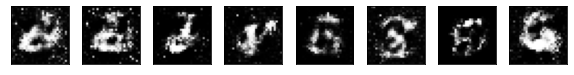

1/1 [==============================] - 0s 13ms/step
[Step 14000] D Loss: 0.4570; G Loss: 0.8939
1/1 [==============================] - 0s 15ms/step


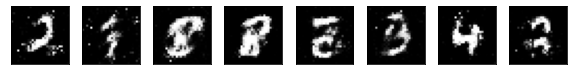

1/1 [==============================] - 0s 13ms/step
[Step 14500] D Loss: 0.4330; G Loss: 1.4176
1/1 [==============================] - 0s 18ms/step


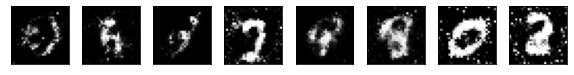

1/1 [==============================] - 0s 14ms/step
[Step 15000] D Loss: 0.5068; G Loss: 0.9705
1/1 [==============================] - 0s 13ms/step


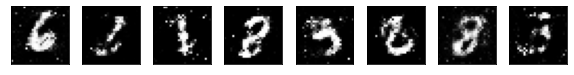

1/1 [==============================] - 0s 14ms/step
[Step 15500] D Loss: 0.4162; G Loss: 1.4839
1/1 [==============================] - 0s 14ms/step


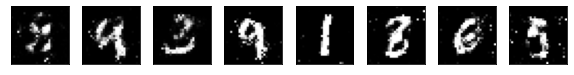

1/1 [==============================] - 0s 13ms/step
[Step 16000] D Loss: 0.6151; G Loss: 0.8123
1/1 [==============================] - 0s 12ms/step


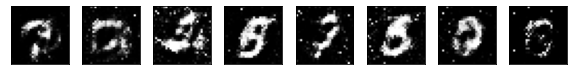

1/1 [==============================] - 0s 16ms/step
[Step 16500] D Loss: 0.7677; G Loss: 0.9916
1/1 [==============================] - 0s 21ms/step


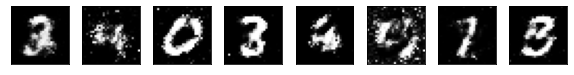

1/1 [==============================] - 0s 13ms/step
[Step 17000] D Loss: 0.5159; G Loss: 1.7116
1/1 [==============================] - 0s 15ms/step


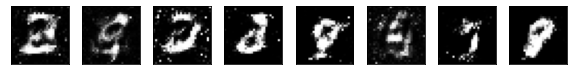

1/1 [==============================] - 0s 14ms/step
[Step 17500] D Loss: 0.6427; G Loss: 0.8747
1/1 [==============================] - 0s 14ms/step


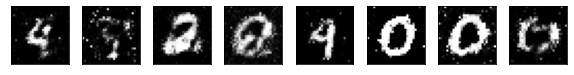

1/1 [==============================] - 0s 13ms/step
[Step 18000] D Loss: 0.6293; G Loss: 1.4267
1/1 [==============================] - 0s 12ms/step


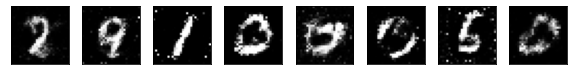

1/1 [==============================] - 0s 14ms/step
[Step 18500] D Loss: 0.5159; G Loss: 1.1401
1/1 [==============================] - 0s 13ms/step


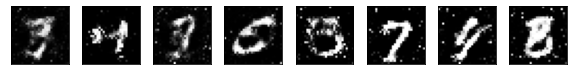

1/1 [==============================] - 0s 13ms/step


In [8]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1)), 
        np.zeros((HALF_BATCH_SIZE, 1))))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined)
        d_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1))
    
    with tf.GradientTape() as tape:
        logits = discriminator(generator(noise, training=True))
        g_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 500 == 0:
        print("[Step %2d] D Loss: %.4f; G Loss: %.4f" % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Generator test: random examples

1/1 [==============================] - 0s 13ms/step


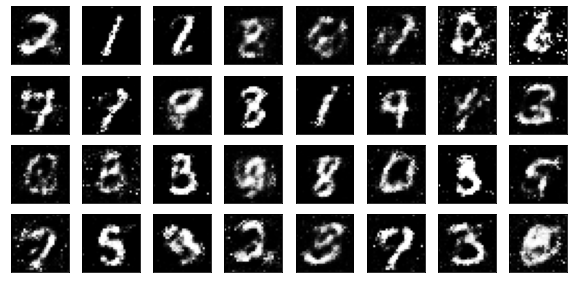

In [9]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Generator test: continuous examples

1/1 [==============================] - 0s 14ms/step


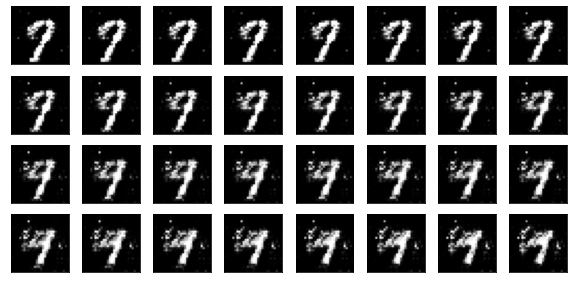

In [10]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Deep Convolutional GAN (DCGAN)

In [11]:
generator = M.Sequential([
    L.Dense(128*7*7, activation="relu"),
    L.Reshape((7, 7, 128)),
    L.UpSampling2D((2, 2)),    
    L.Conv2D(128, (3, 3), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.ReLU(),    
    L.UpSampling2D((2, 2)),    
    L.Conv2D(64, (3, 3), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.ReLU(),    
    L.Conv2D(1, (3, 3), padding="same", activation='tanh'),
])

discriminator = M.Sequential([
    L.Conv2D(32, (3, 3), strides=(2, 2), padding="same"),
    L.LeakyReLU(0.2),
    L.Dropout(0.25),    
    L.Conv2D(64, kernel_size=3, strides=(2, 2), padding="same"),
    L.ZeroPadding2D(padding=((0, 1), (0, 1))),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Conv2D(128, kernel_size=3, strides=(2, 2), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Conv2D(256, kernel_size=3, strides=(1, 1), padding="same"),
    L.BatchNormalization(momentum=0.8),
    L.LeakyReLU(alpha=0.2),
    L.Dropout(0.25),
    L.Flatten(),
    L.Dense(1, activation=None),
])

## Training parameters, dataset pipeline, optimizer

In [12]:
INPUT_DIM = 100
NUM_EPOCHS = 2
HALF_BATCH_SIZE = 16
BATCH_SIZE = HALF_BATCH_SIZE * 2
LEARNING_RATE = 0.0002

train_ds = tf.data.Dataset.from_tensor_slices(train_x.reshape(-1, 28, 28, 1))
train_ds = train_ds.shuffle(buffer_size=train_x.shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(HALF_BATCH_SIZE, drop_remainder=True)

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

## DCGAN training

1/1 [==============================] - 5s 5s/step
[Step  0] D Loss: 0.6063; G Loss: 0.6638
1/1 [==============================] - 0s 62ms/step


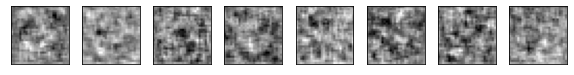

1/1 [==============================] - 0s 13ms/step
[Step 200] D Loss: 0.3462; G Loss: 1.8312
1/1 [==============================] - 0s 13ms/step


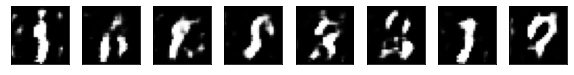

1/1 [==============================] - 0s 14ms/step
[Step 400] D Loss: 0.6332; G Loss: 1.0599
1/1 [==============================] - 0s 14ms/step


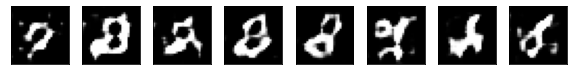

1/1 [==============================] - 0s 14ms/step
[Step 600] D Loss: 0.4406; G Loss: 1.6668
1/1 [==============================] - 0s 13ms/step


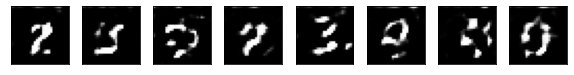

1/1 [==============================] - 0s 13ms/step
[Step 800] D Loss: 0.5637; G Loss: 0.9788
1/1 [==============================] - 0s 14ms/step


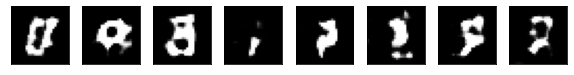

1/1 [==============================] - 0s 15ms/step
[Step 1000] D Loss: 0.6867; G Loss: 1.3652
1/1 [==============================] - 0s 14ms/step


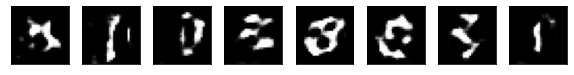

1/1 [==============================] - 0s 13ms/step
[Step 1200] D Loss: 0.5981; G Loss: 1.2276
1/1 [==============================] - 0s 14ms/step


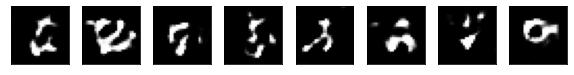

1/1 [==============================] - 0s 15ms/step
[Step 1400] D Loss: 0.7276; G Loss: 0.8642
1/1 [==============================] - 0s 15ms/step


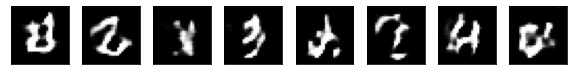

1/1 [==============================] - 0s 13ms/step
[Step 1600] D Loss: 0.7699; G Loss: 0.5947
1/1 [==============================] - 0s 13ms/step


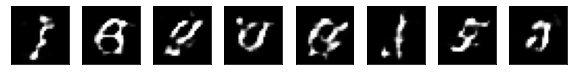

1/1 [==============================] - 0s 15ms/step
[Step 1800] D Loss: 0.6693; G Loss: 0.7489
1/1 [==============================] - 0s 13ms/step


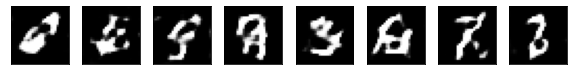

1/1 [==============================] - 0s 15ms/step
[Step 2000] D Loss: 0.7433; G Loss: 0.9872
1/1 [==============================] - 0s 19ms/step


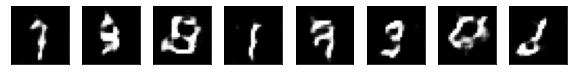

1/1 [==============================] - 0s 16ms/step
[Step 2200] D Loss: 0.6908; G Loss: 0.8978
1/1 [==============================] - 0s 13ms/step


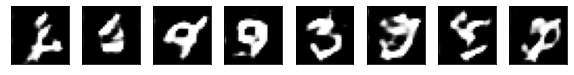

1/1 [==============================] - 0s 15ms/step
[Step 2400] D Loss: 0.4771; G Loss: 1.1423
1/1 [==============================] - 0s 13ms/step


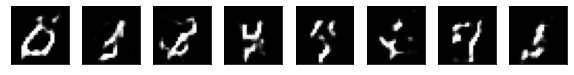

1/1 [==============================] - 0s 14ms/step
[Step 2600] D Loss: 0.6780; G Loss: 0.7839
1/1 [==============================] - 0s 20ms/step


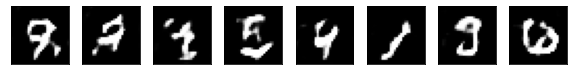

1/1 [==============================] - 0s 13ms/step
[Step 2800] D Loss: 0.8458; G Loss: 0.7953
1/1 [==============================] - 0s 15ms/step


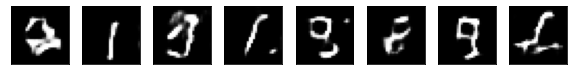

1/1 [==============================] - 0s 22ms/step
[Step 3000] D Loss: 0.6720; G Loss: 0.9258
1/1 [==============================] - 0s 20ms/step


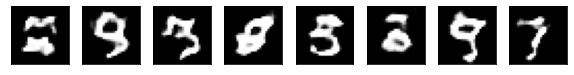

1/1 [==============================] - 0s 14ms/step
[Step 3200] D Loss: 0.8561; G Loss: 0.7902
1/1 [==============================] - 0s 14ms/step


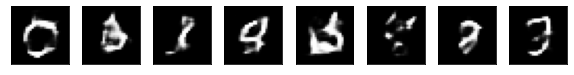

1/1 [==============================] - 0s 13ms/step
[Step 3400] D Loss: 0.6470; G Loss: 0.7066
1/1 [==============================] - 0s 15ms/step


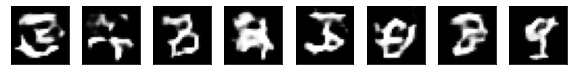

1/1 [==============================] - 0s 14ms/step
[Step 3600] D Loss: 0.7336; G Loss: 0.7115
1/1 [==============================] - 0s 15ms/step


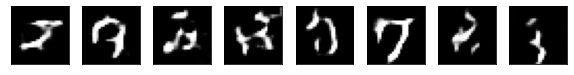

1/1 [==============================] - 0s 19ms/step
[Step 3800] D Loss: 0.7236; G Loss: 1.0214
1/1 [==============================] - 0s 15ms/step


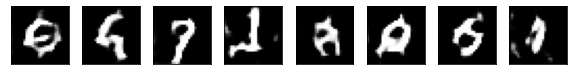

1/1 [==============================] - 0s 16ms/step
[Step 4000] D Loss: 0.6962; G Loss: 0.9122
1/1 [==============================] - 0s 14ms/step


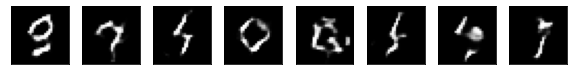

1/1 [==============================] - 0s 13ms/step
[Step 4200] D Loss: 0.7738; G Loss: 0.7783
1/1 [==============================] - 0s 15ms/step


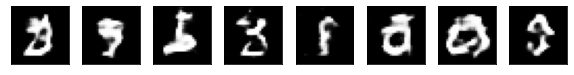

1/1 [==============================] - 0s 15ms/step
[Step 4400] D Loss: 0.6079; G Loss: 0.8943
1/1 [==============================] - 0s 18ms/step


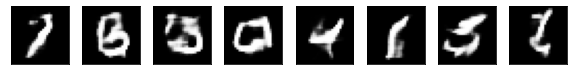

1/1 [==============================] - 0s 15ms/step
[Step 4600] D Loss: 0.6470; G Loss: 0.7878
1/1 [==============================] - 0s 15ms/step


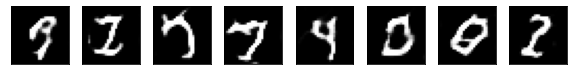

1/1 [==============================] - 0s 14ms/step
[Step 4800] D Loss: 0.7026; G Loss: 0.6840
1/1 [==============================] - 0s 19ms/step


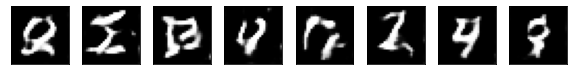

1/1 [==============================] - 0s 13ms/step
[Step 5000] D Loss: 0.6602; G Loss: 0.8545
1/1 [==============================] - 0s 13ms/step


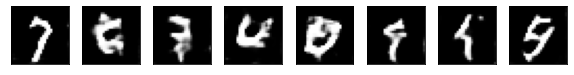

1/1 [==============================] - 0s 13ms/step
[Step 5200] D Loss: 0.7741; G Loss: 0.7142
1/1 [==============================] - 0s 19ms/step


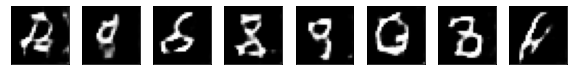

1/1 [==============================] - 0s 13ms/step
[Step 5400] D Loss: 0.7439; G Loss: 1.0450
1/1 [==============================] - 0s 13ms/step


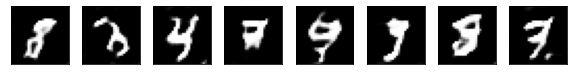

1/1 [==============================] - 0s 13ms/step
[Step 5600] D Loss: 0.4376; G Loss: 1.0858
1/1 [==============================] - 0s 17ms/step


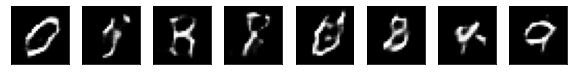

1/1 [==============================] - 0s 15ms/step
[Step 5800] D Loss: 0.6589; G Loss: 0.7145
1/1 [==============================] - 0s 21ms/step


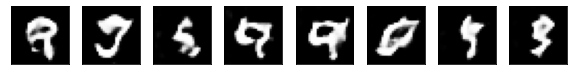

1/1 [==============================] - 0s 13ms/step
[Step 6000] D Loss: 0.8598; G Loss: 0.7609
1/1 [==============================] - 0s 13ms/step


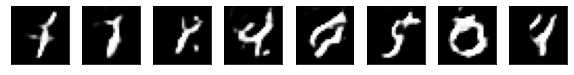

1/1 [==============================] - 0s 13ms/step
[Step 6200] D Loss: 0.6653; G Loss: 0.6474
1/1 [==============================] - 0s 14ms/step


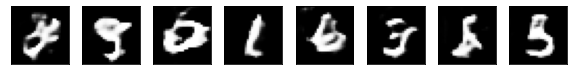

1/1 [==============================] - 0s 18ms/step
[Step 6400] D Loss: 0.5902; G Loss: 0.7280
1/1 [==============================] - 0s 22ms/step


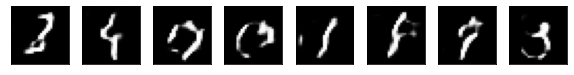

1/1 [==============================] - 0s 13ms/step
[Step 6600] D Loss: 0.7254; G Loss: 0.8164
1/1 [==============================] - 0s 14ms/step


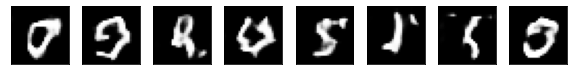

1/1 [==============================] - 0s 13ms/step
[Step 6800] D Loss: 0.6360; G Loss: 0.7084
1/1 [==============================] - 0s 16ms/step


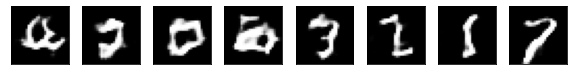

1/1 [==============================] - 0s 17ms/step
[Step 7000] D Loss: 0.7684; G Loss: 0.6535
1/1 [==============================] - 0s 27ms/step


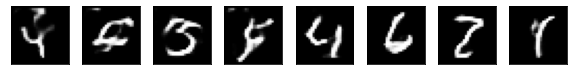

1/1 [==============================] - 0s 16ms/step
[Step 7200] D Loss: 0.6976; G Loss: 0.8689
1/1 [==============================] - 0s 13ms/step


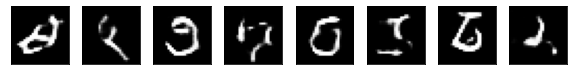

1/1 [==============================] - 0s 13ms/step
[Step 7400] D Loss: 0.6626; G Loss: 0.9066
1/1 [==============================] - 0s 15ms/step


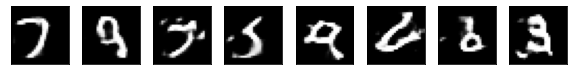

1/1 [==============================] - 0s 14ms/step


In [13]:
for step, true_images in enumerate(train_ds):
    
    # Train Discriminator
    
    noise = np.random.normal(0, 1, (HALF_BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    syntetic_images = generator.predict(noise)
    x_combined = np.concatenate((
        true_images, 
        syntetic_images))
    y_combined = np.concatenate((
        np.ones((HALF_BATCH_SIZE, 1)), 
        np.zeros((HALF_BATCH_SIZE, 1))))
    
    with tf.GradientTape() as tape:
        logits = discriminator(x_combined, training=True)
        d_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_combined, logits)
    grads = tape.gradient(d_loss_value, discriminator.trainable_variables)
    optimizer.apply_gradients(zip(grads, discriminator.trainable_variables))
    
    # Train Generator
    
    noise = np.random.normal(0, 1, (BATCH_SIZE, INPUT_DIM)).astype(np.float32)
    y_mislabled = np.ones((BATCH_SIZE, 1))
    
    with tf.GradientTape() as tape:
        syntetic = generator(noise, training=True)
        logits = discriminator(syntetic, training=False)
        g_loss_value = tf.compat.v1.losses.sigmoid_cross_entropy(y_mislabled, logits)
    grads = tape.gradient(g_loss_value, generator.trainable_variables)
    optimizer.apply_gradients(zip(grads, generator.trainable_variables))
    
    # Check intermediate results
    
    if step % 200 == 0:
        print("[Step %2d] D Loss: %.4f; G Loss: %.4f" % (
            step, d_loss_value.numpy(), g_loss_value.numpy()))
        noise = np.random.normal(0, 1, (8, INPUT_DIM)).astype(np.float32)
        syntetic_images = generator.predict(noise)
        plot_digits(syntetic_images)


## Generator test: random examples

1/1 [==============================] - 0s 13ms/step


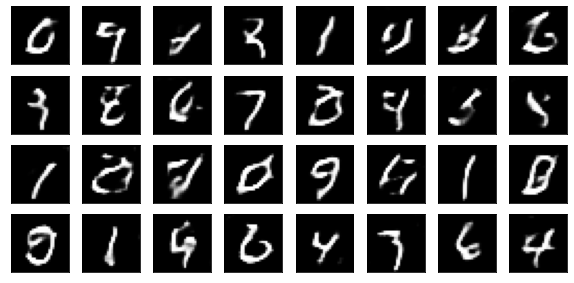

In [14]:
noise = np.random.normal(0, 1, (32, INPUT_DIM)).astype(np.float32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

## Generator test: continuous examples

1/1 [==============================] - 0s 14ms/step


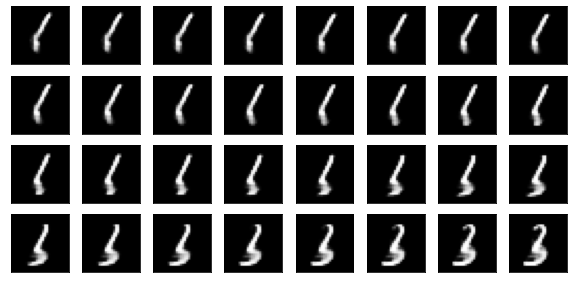

In [15]:
noise_1 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise_2 = np.random.normal(0, 1, (INPUT_DIM)).astype(np.float32)
noise = np.linspace(noise_1, noise_2, 32)
syntetic_images = generator.predict(noise)
plot_digits(syntetic_images)

In [ ]:
# больше примеров можно найти тут https://github.com/eriklindernoren/Keras-GAN